# Libs

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read data

In [85]:
path_venda = "https://raw.githubusercontent.com/Felisouza/case_wiz_co/main/data/venda.csv"
path_receita = "https://raw.githubusercontent.com/Felisouza/case_wiz_co/main/data/receita.csv"

In [88]:
df_receita = pd.read_csv(path_receita, sep=',')
df_venda = pd.read_csv(path_venda, sep=',')

# Análise exploratória

## Análise exploratória receita

In [89]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita
0,2019,1,72,58,1,"65,3"
1,2019,1,72,57,4,"1360,235"
2,2019,1,72,56,3,"276,49"
3,2019,1,72,47,2,"-1707,095"
4,2019,1,72,38,3,"1080,745"


### Fix receita float

In [90]:
df_receita['receita'] = df_receita['receita'].apply(lambda x: x.replace(',', '.')).astype('float').fillna(0)

In [92]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita
0,2019,1,72,58,1,65.300
1,2019,1,72,57,4,1360.235
2,2019,1,72,56,3,276.490
3,2019,1,72,47,2,-1707.095
4,2019,1,72,38,3,1080.745


In [7]:
df_receita[['vendedor', 'seguradora']] = df_receita[['vendedor', 'seguradora']].astype('str')

In [93]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           1080 non-null   int64  
 1   mes           1080 non-null   int64  
 2   seguradora    1080 non-null   int64  
 3   vendedor      1080 non-null   int64  
 4   tot_apolices  1080 non-null   int64  
 5   receita       1080 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 50.8 KB


## Estatísticas descritivas

In [94]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           1080 non-null   int64  
 1   mes           1080 non-null   int64  
 2   seguradora    1080 non-null   int64  
 3   vendedor      1080 non-null   int64  
 4   tot_apolices  1080 non-null   int64  
 5   receita       1080 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 50.8 KB


In [95]:
df_receita.describe()

,ano,mes,seguradora,vendedor,tot_apolices,receita
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.000000
mean,2019.352778,5.695370,56.596296,29.499074,3.32963,1201.460574
std,0.478056,3.195626,18.292495,17.801292,3.61808,4632.482693
min,2019.000000,1.000000,4.000000,1.000000,1.00000,-4622.065000
25%,2019.000000,3.000000,44.000000,16.000000,1.00000,109.560000
50%,2019.000000,5.000000,66.000000,20.000000,2.00000,309.747500
75%,2020.000000,8.000000,72.000000,43.000000,4.00000,959.635000
max,2020.000000,12.000000,83.000000,59.000000,34.00000,125950.595000


## Receita por ano

[Text(0, 0, '1069.97'), Text(0, 0, '1442.7')]

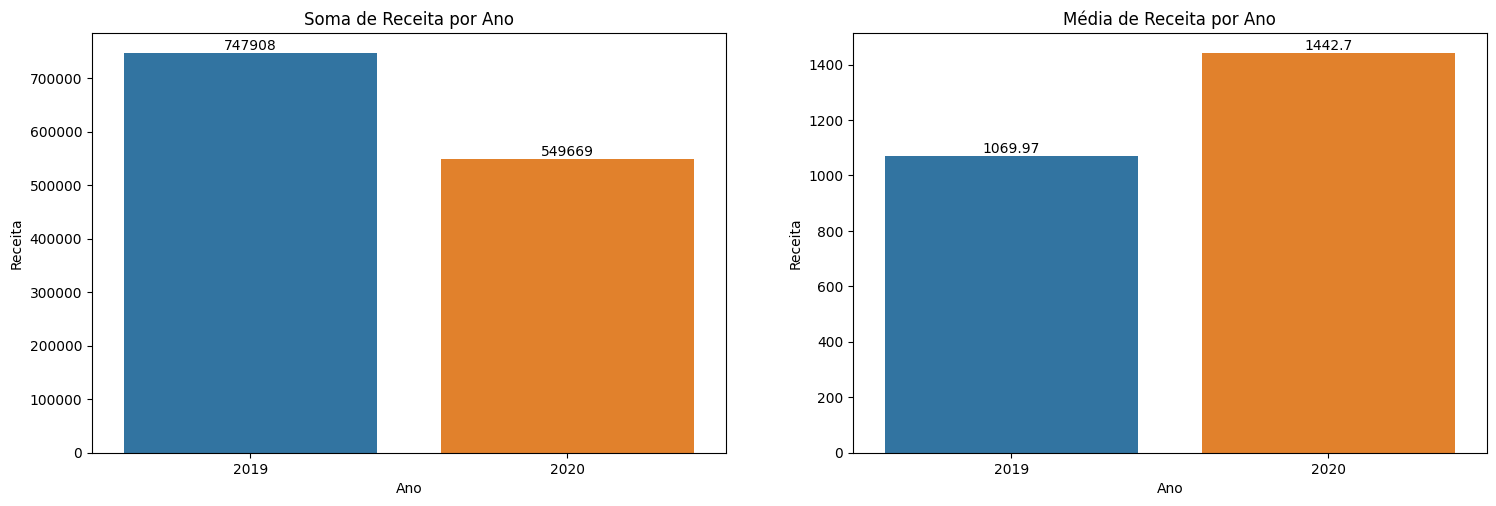

In [11]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('ano').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Soma de Receita por Ano')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('ano').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Média de Receita por Ano')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


In [12]:
df_receita.groupby('ano').count()['mes']
# Em 2019 tivemos mais vendas com valores menores.

ano
2019    699
2020    381
Name: mes, dtype: int64

## Receita por mês

[Text(0, 0, '1037.16'),
 Text(0, 0, '1180.85'),
 Text(0, 0, '1102.68'),
 Text(0, 0, '1181.96'),
 Text(0, 0, '1119.6'),
 Text(0, 0, '1282.42'),
 Text(0, 0, '839.524'),
 Text(0, 0, '936.652'),
 Text(0, 0, '1212.91'),
 Text(0, 0, '856.737'),
 Text(0, 0, '794.666'),
 Text(0, 0, '3528.83')]

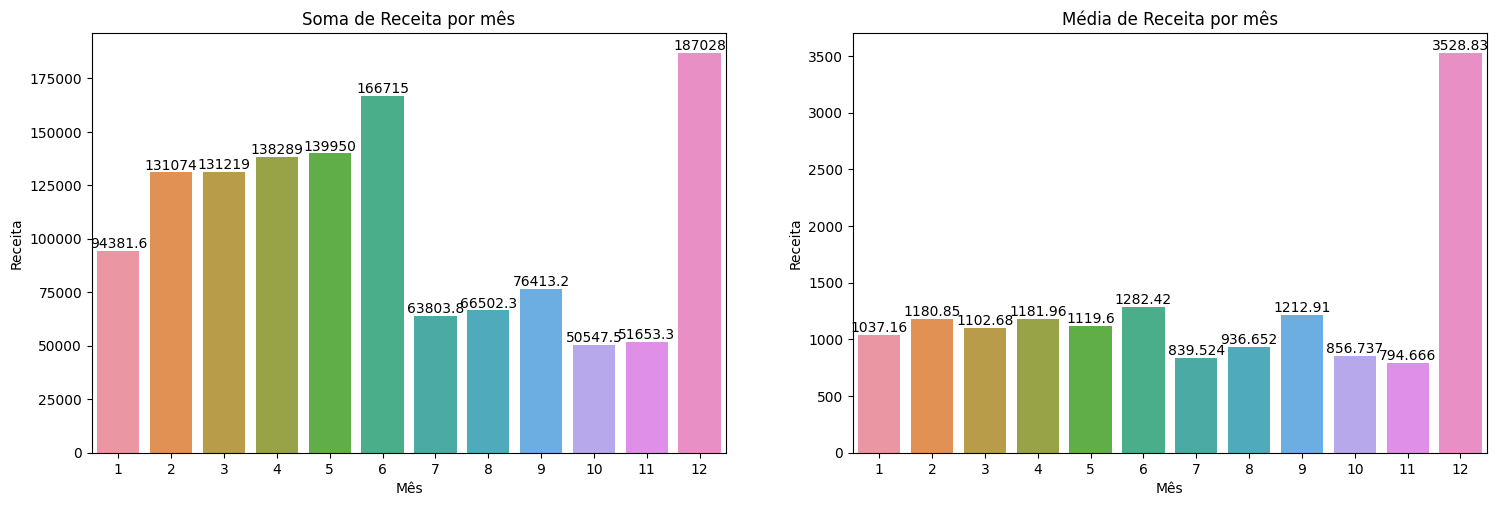

In [13]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('mes').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='mes', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Soma de Receita por mês')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('mes').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='mes', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Média de Receita por mês')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


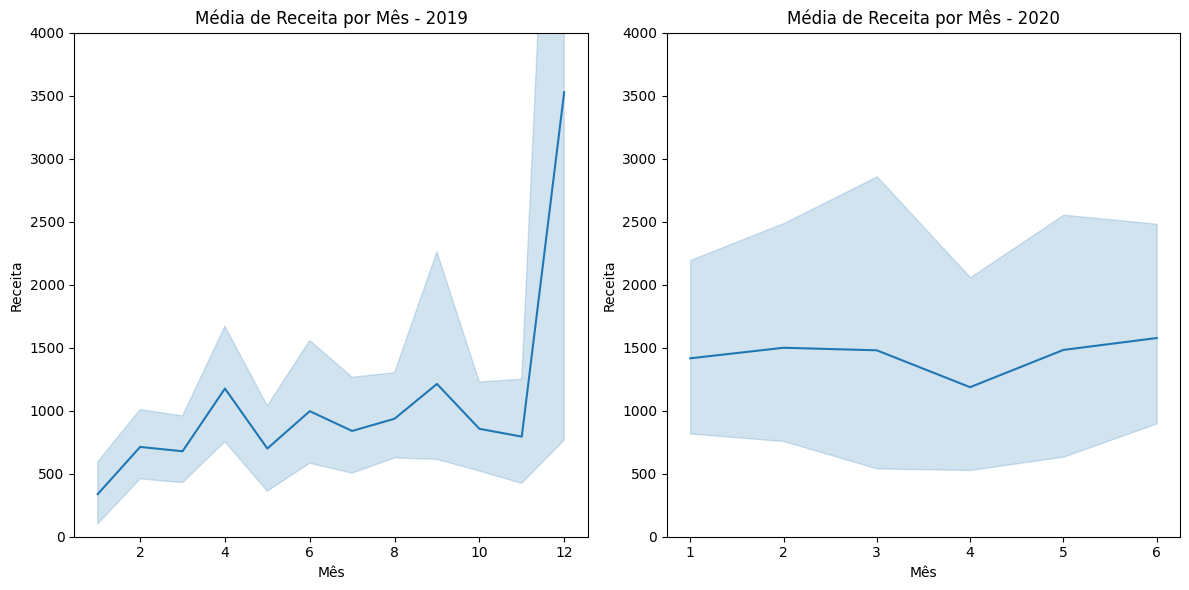

In [14]:
# Filtrar os dados de 2019
dados_2019 = df_receita[df_receita['ano'] == 2019]

# Filtrar os dados de 2020
dados_2020 = df_receita[df_receita['ano'] == 2020]

# Criar figura e eixos dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar gráfico para 2019
sns.lineplot(x='mes', y='receita', data=dados_2019, ax=axes[0])
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Receita')
axes[0].set_title('Média de Receita por Mês - 2019')
axes[0].set(ylim=(0, 4000))

# Plotar gráfico para 2020
sns.lineplot(x='mes', y='receita', data=dados_2020, ax=axes[1])
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Receita')
axes[1].set_title('Média de Receita por Mês - 2020')
axes[1].set(ylim=(0, 4000))


# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Em 2019 a média da receita foi bem mais estável
# Pq esse pico em dezembro de 2019? Era esperado? 

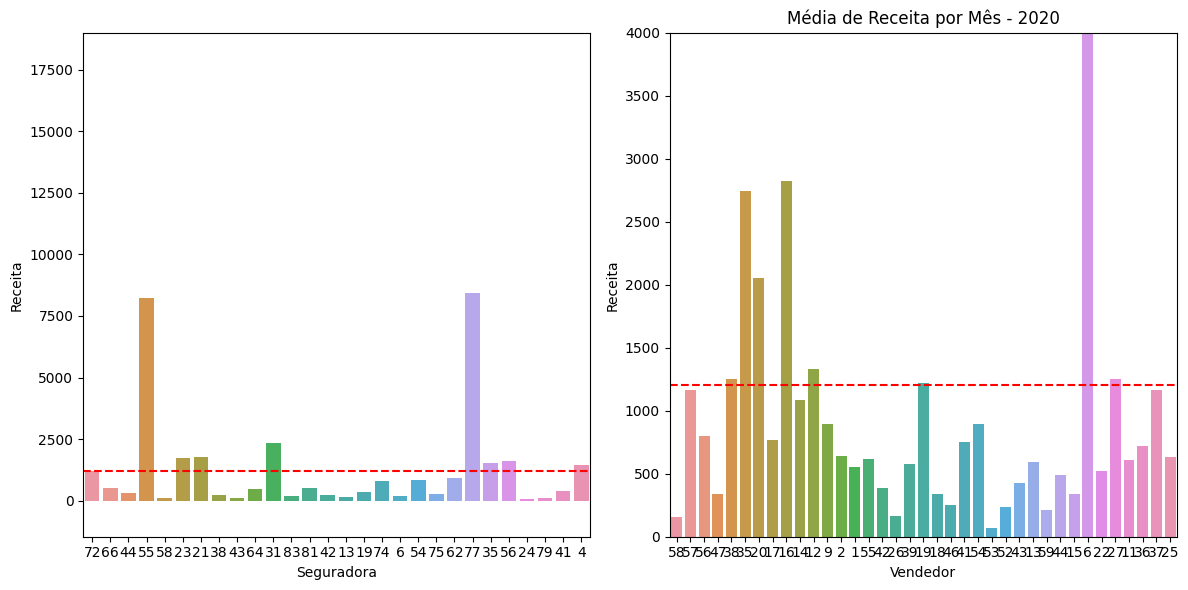

In [15]:
df_receita['vendedor'] = df_receita['vendedor'].astype(str)

# Filtrar os dados de 2019
dados_2019 = df_receita[df_receita['ano'] == 2019]

# Filtrar os dados de 2020
dados_2020 = df_receita[df_receita['ano'] == 2020]

# Criar figura e eixos dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar gráfico para 2019
sns.barplot(x='seguradora', y='receita', data=df_receita, ax=axes[0], errwidth=0)
axes[0].set_xlabel('Seguradora')
axes[0].set_ylabel('Receita')
# axes[0].set(ylim=(0, 4000))

# Traçar a linha da média da receita
mean_receita = df_receita['receita'].mean()
axes[0].axhline(mean_receita, color='r', linestyle='--', label='Média')

# Plotar gráfico para 2020
sns.barplot(x='vendedor', y='receita', data=df_receita, ax=axes[1], errwidth=0)
axes[1].set_xlabel('Vendedor')
axes[1].set_ylabel('Receita')
axes[1].set_title('Média de Receita por Mês - 2020')
axes[1].set(ylim=(0, 4000))

# Traçar a linha da média da receita
mean_receita = df_receita['receita'].mean()
axes[1].axhline(mean_receita, color='r', linestyle='--', label='Média')


# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Passar uma linha média para ver quem está abaixo ou acima da média.
# Destacar ?

In [16]:
(
    df_receita[
        (df_receita['seguradora'].isin([55, 77])) &
        (df_receita['ano'] == 2020)]
    [['receita', 'seguradora']]
    .groupby('seguradora').sum()
)

,receita
seguradora,


In [17]:
vendedores_acima_media = df_receita[df_receita['receita'] > mean_receita].nlargest(3, 'receita')

# Imprimir os vendedores acima da média de renda
print("Vendedores acima da média de renda:")
for index, row in vendedores_acima_media.iterrows():
    print(row['vendedor'], row['receita'])

Vendedores acima da média de renda:
16 125950.595
20 30301.38
20 26450.0


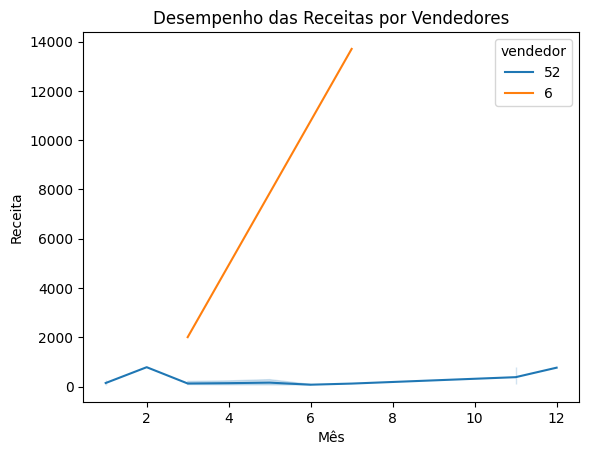

In [18]:
# Plotar gráfico usando Seaborn
sns.lineplot(x='mes', y='receita', hue='vendedor', data=df_receita[df_receita['vendedor'].isin(['6', '61', '73', '52'])])

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Desempenho das Receitas por Vendedores')

# Exibir o gráfico
plt.show()

# [df_receita['seguradora'].isin([55, 56, 77])]

In [19]:
df_receita[df_receita['vendedor'].isin([6, 61, 73, 53])]['vendedor'].unique()

array([], dtype=object)

In [20]:
# # Dados de exemplo
# dados = {
#     'seguradora': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
#     'receita': [1000.0, 1500.0, 1200.0, 1800.0, 2000.0, 1700.0, 1300.0, 1600.0, 1400.0, 1900.0]
# }

# # Criar DataFrame do Pandas
# df_receita = pd.DataFrame(dados)

# # Criar figura e eixos dos subplots
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# # Plotar gráfico para 2019
# sns.barplot(x='seguradora', y='receita', data=df_receita, ax=axes, errwidth=0)

# # Traçar a linha da média da receita
# mean_receita = df_receita['receita'].mean()
# axes.axhline(mean_receita, color='r', linestyle='--', label='Média')

# # Configurações do gráfico
# axes.set_xlabel('Seguradora')
# axes.set_ylabel('Receita')
# axes.set_title('Média de Receita por Seguradora')
# axes.legend()

# # Ajustar espaçamento entre os subplots
# plt.tight_layout()

# # Exibir o gráfico
# plt.show()

## Total receita

In [21]:
df_receita['tot_receita'] = df_receita['tot_apolices']*df_receita['receita']

# Análise exploratória vendas

In [22]:
df_venda.head()

,ano,mes,seguradora,vendedor,tot_apolices,venda
0,2019,1,66,1,1,"174,055"
1,2019,1,31,58,1,"92,31"
2,2019,1,72,35,6,"900,08"
3,2019,1,55,20,1,7550
4,2019,1,72,58,2,"84,175"


## Estatísticas descritivas

In [23]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           1242 non-null   int64 
 1   mes           1242 non-null   int64 
 2   seguradora    1242 non-null   int64 
 3   vendedor      1242 non-null   int64 
 4   tot_apolices  1242 non-null   int64 
 5   venda         1238 non-null   object
dtypes: int64(5), object(1)
memory usage: 58.3+ KB


## Fix valor venda para float

In [24]:
for i in df_venda['venda']:
    if type(i) != str:
        print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [25]:
df_venda['venda'] = df_venda['venda'].fillna('0.0').apply(lambda x: x.replace(',', '.')).astype('float')

In [26]:
df_venda.describe()

,ano,mes,seguradora,vendedor,tot_apolices,venda
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,2019.359903,5.566023,55.528986,28.516103,3.416264,1261.065845
std,0.480165,3.261018,19.054768,17.278731,3.798065,6876.514842
min,2019.000000,1.000000,4.000000,1.000000,1.000000,-61874.485000
25%,2019.000000,3.000000,44.000000,16.000000,1.000000,90.246250
50%,2019.000000,5.000000,66.000000,20.000000,2.000000,253.110000
75%,2020.000000,8.000000,72.000000,42.000000,4.000000,840.222500
max,2020.000000,12.000000,83.000000,59.000000,36.000000,148598.290000


## Vendas total

In [27]:
df_venda['tot_venda'] = df_venda['tot_apolices']*df_venda['venda']

In [28]:
df_venda[['vendedor', 'seguradora']] = df_venda[['vendedor', 'seguradora']].astype('str')

## Vendas por ano

[Text(0, 0, '1069.97'), Text(0, 0, '1442.7')]

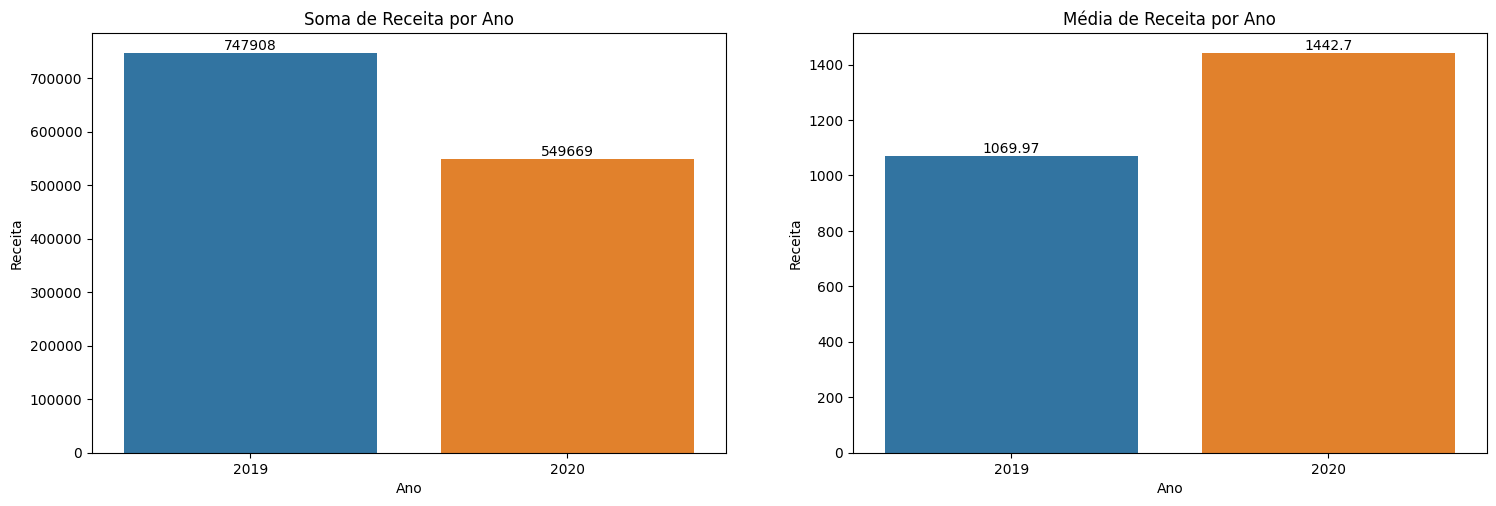

In [29]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('ano').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Soma de Receita por Ano')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('ano').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Média de Receita por Ano')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


## Vendas por mês

[Text(0, 0, '2557.55'),
 Text(0, 0, '805.211'),
 Text(0, 0, '771.252'),
 Text(0, 0, '615.261'),
 Text(0, 0, '1260.68'),
 Text(0, 0, '1365.1'),
 Text(0, 0, '716.421'),
 Text(0, 0, '1659.56'),
 Text(0, 0, '556.94'),
 Text(0, 0, '953.93'),
 Text(0, 0, '855.095'),
 Text(0, 0, '2865.98')]

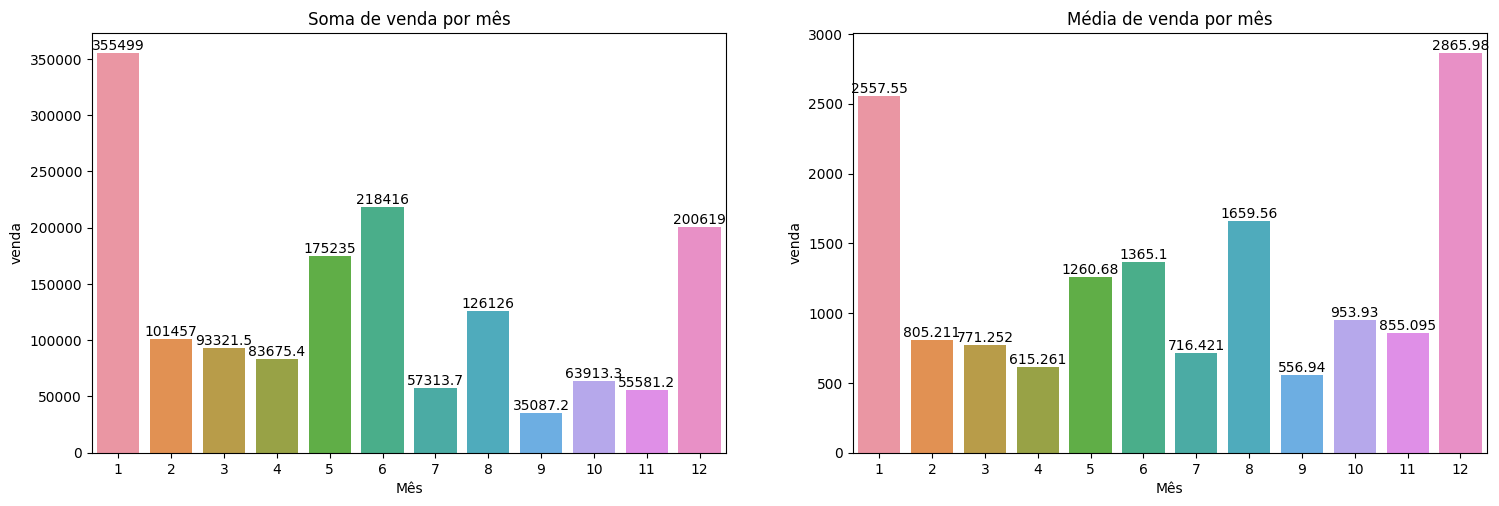

In [30]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_venda.groupby('mes').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='mes', y='venda', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('venda')
plt.title('Soma de venda por mês')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_venda.groupby('mes').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='mes', y='venda', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('venda')
plt.title('Média de venda por mês')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


# Vendedores e seguradora para string

In [31]:
df_venda['vendedor'] = df_venda['vendedor'].astype(str)
df_venda['seguradora'] = df_venda['seguradora'].astype(str)
df_venda.dtypes





ano               int64
mes               int64
seguradora       object
vendedor         object
tot_apolices      int64
venda           float64
tot_venda       float64
dtype: object

# Mês por extenso

In [32]:
df_venda['month_name'] = df_venda['mes'].apply(lambda x:  calendar.month_name[x])
df_receita['month_name'] = df_receita['mes'].apply(lambda x:  calendar.month_name[x])

df_receita['receita'].apply(lambda x: x.replace(',', '.')).astype('float').fillna(0)

In [33]:
df_venda.columns

Index(['ano', 'mes', 'seguradora', 'vendedor', 'tot_apolices', 'venda',
       'tot_venda', 'month_name'],
      dtype='object')

# Inadimplente ou não

In [34]:
df_venda.head()

,ano,mes,seguradora,vendedor,tot_apolices,venda,tot_venda,month_name
0,2019,1,66,1,1,174.055,174.055,January
1,2019,1,31,58,1,92.310,92.310,January
2,2019,1,72,35,6,900.080,5400.480,January
3,2019,1,55,20,1,7550.000,7550.000,January
4,2019,1,72,58,2,84.175,168.350,January


In [35]:
df_receita.sort_values(['ano', 'mes', 'seguradora']).head()

,ano,mes,seguradora,vendedor,tot_apolices,receita,tot_receita,month_name
31,2019,1,21,12,1,3225.780,3225.780,January
30,2019,1,23,20,1,110.800,110.800,January
22,2019,1,44,56,1,84.095,84.095,January
23,2019,1,44,42,1,81.800,81.800,January
24,2019,1,44,38,4,474.080,1896.320,January


In [36]:
df1 = df_venda.groupby(['ano', 'mes', 'seguradora'], as_index=False)['tot_venda'].sum()
df2 = df_receita.groupby(['ano', 'mes', 'seguradora'], as_index=False)['tot_receita'].sum()

In [37]:
np.array_equal(df1['seguradora'].unique(), df2['seguradora'].unique())

False

In [38]:
np.sort(df1['seguradora'].unique())

array(['13', '19', '21', '23', '24', '31', '33', '35', '38', '4', '41',
       '42', '43', '44', '51', '54', '55', '56', '58', '6', '62', '64',
       '66', '68', '72', '74', '75', '77', '78', '79', '81', '83'],
      dtype=object)

In [39]:
np.sort(df2['seguradora'].unique())

array(['13', '19', '21', '23', '24', '31', '35', '38', '4', '41', '42',
       '43', '44', '54', '55', '56', '58', '6', '62', '64', '66', '72',
       '74', '75', '77', '79', '81', '83'], dtype=object)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          220 non-null    int64  
 1   mes          220 non-null    int64  
 2   seguradora   220 non-null    object 
 3   tot_receita  220 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.0+ KB


In [41]:
df_inadimplente = df1.merge(df2, how='left', on=['ano', 'mes', 'seguradora'])
df_inadimplente['valor_recebido'] = df_inadimplente['tot_receita'] - df_inadimplente['tot_venda']
df_inadimplente.head(50)

,ano,mes,seguradora,tot_venda,tot_receita,valor_recebido
0,2019,1,19,635.870,NaN,NaN
1,2019,1,21,3621.775,3225.780,-395.995
2,2019,1,23,230.750,110.800,-119.950
3,2019,1,31,7496.915,NaN,NaN
4,2019,1,38,1015.500,NaN,NaN
5,2019,1,43,424.550,NaN,NaN
6,2019,1,44,18295.420,2283.325,-16012.095
7,2019,1,55,7550.000,1283.105,-6266.895
8,2019,1,58,350.350,350.350,0.000
9,2019,1,64,12595.760,NaN,NaN


In [42]:
df_inadimplente[df_inadimplente['valor_recebido']>0]['mes'].value_counts().sort_index(ascending=True)

mes
1      4
2      9
3     11
4      8
5     10
6      8
7      6
8      4
9      6
10     5
11     6
12     7
Name: count, dtype: int64

In [43]:
df_inadimplente[df_inadimplente['valor_recebido']<0]['mes'].value_counts().sort_index(ascending=True)

mes
1     11
2      8
3     10
4     11
5      8
6     13
7      5
8      7
9      2
10     4
11     7
12     4
Name: count, dtype: int64

# Exportando dados

## Dados de vendas

In [44]:
df_venda.to_csv(r"./data/df_venda.csv", sep=';', decimal=',')

In [45]:
valor1 = df_venda[df_venda['ano']==2019]['venda'].sum()
valor2 = df_venda[df_venda['ano']==2019]['tot_apolices'].sum()
valor1*valor2

2605059423.45

In [35]:
df_venda['total_venda'] = df_venda['tot_apolices']*df_venda['venda']

## Dados de receita

In [36]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita,tot_receita,month_name
0,2019,1,72,58,1,65.300,65.300,January
1,2019,1,72,57,4,1360.235,5440.940,January
2,2019,1,72,56,3,276.490,829.470,January
3,2019,1,72,47,2,-1707.095,-3414.190,January
4,2019,1,72,38,3,1080.745,3242.235,January


In [37]:
df_receita.to_csv(r"./data/df_receita.csv", sep=';', decimal=',')

# Modelagem

In [53]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           1242 non-null   int64  
 1   mes           1242 non-null   int64  
 2   seguradora    1242 non-null   object 
 3   vendedor      1242 non-null   object 
 4   tot_apolices  1242 non-null   int64  
 5   venda         1242 non-null   float64
 6   tot_venda     1242 non-null   float64
 7   month_name    1242 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 77.8+ KB


In [55]:

# Definir o dataframe df_venda
df = df_venda.drop(['month_name'], axis=1)
df['seguradora'] = df['seguradora'].astype('int64')
df['vendedor'] = df['vendedor'].astype('int64')


# Separar o dataframe em features (X) e target (y)
X = df.drop('tot_venda', axis=1)
y = df['tot_venda']

# Separar em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os tamanhos dos conjuntos resultantes
print("Tamanho do conjunto de treinamento:", len(X_treino))
print("Tamanho do conjunto de teste:", len(X_teste))


Tamanho do conjunto de treinamento: 869
Tamanho do conjunto de teste: 373


In [56]:
# Criar uma instância do modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treinamento
modelo.fit(X_treino, y_treino)

# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_teste)

# Calcular o erro médio quadrático (RMSE) das previsões
rmse = mean_squared_error(y_teste, y_pred, squared=False)

# Imprimir o RMSE
print("RMSE:", rmse)


RMSE: 30113.65320199372


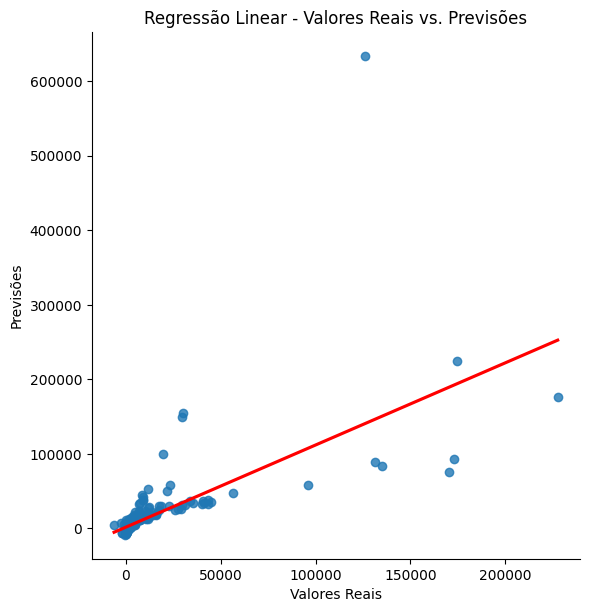

In [61]:


# Criar um DataFrame com as previsões e os valores reais
df_pred = pd.DataFrame({'y_teste': y_teste, 'y_pred': y_pred})

# Plotar o gráfico com a regressão linear
sns.lmplot(x='y_teste', y='y_pred', data=df_pred, height=6, line_kws={'color': 'red'}, ci=None)
plt.title('Regressão Linear - Valores Reais vs. Previsões')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()


## julho a dezembro 2020

In [63]:
df.head()

,ano,mes,seguradora,vendedor,tot_apolices,venda,tot_venda
0,2019,1,66,1,1,174.055,174.055
1,2019,1,31,58,1,92.310,92.310
2,2019,1,72,35,6,900.080,5400.480
3,2019,1,55,20,1,7550.000,7550.000
4,2019,1,72,58,2,84.175,168.350


In [65]:
y_pred

array([ 5.72853022e+03,  3.05128270e+04, -5.70771518e+03, -3.13716276e+03,
       -1.49493736e+03,  1.36193887e+03,  3.79559208e+04,  6.16345193e+03,
        4.51976142e+03,  1.12019023e+04, -1.43458954e+03, -6.11963825e+03,
        3.00429556e+04, -1.28059289e+03,  3.08892163e+04, -3.86897063e+03,
        6.43567410e+03, -4.43735910e+03, -2.71512502e+03, -1.39768141e+03,
       -4.70883708e+03,  2.59698980e+03,  2.67952878e+03,  2.28136043e+04,
       -1.07366033e+02,  3.22118478e+02, -2.05693007e+03,  5.45493625e+02,
        1.41683450e+04, -2.34417117e+03,  5.86702084e+04,  7.39641436e+03,
       -1.71610678e+03,  3.38560063e+04,  1.54472460e+05,  1.30489215e+04,
       -3.85707896e+03,  2.02590878e+03,  9.89893586e+03,  2.52167925e+04,
       -2.61102678e+03,  3.50300307e+04, -5.91368330e+03,  8.22459887e+03,
        6.87520696e+03, -1.52511628e+03,  3.33444155e+03,  4.50950218e+04,
        2.92146684e+04,  2.65476095e+04,  3.15107538e+03, -2.68043229e+03,
        5.40917687e+03, -

In [72]:
meses_pred_idx = pd.date_range(start='2020-07-01', end='2020-12-31', freq='M')

In [73]:
df_previsoes = pd.DataFrame(index=meses_pred_idx, columns=['tot_venda'], data=df)


In [74]:
df_previsoes

,tot_venda
2020-07-31,NaN
2020-08-31,NaN
2020-09-30,NaN
2020-10-31,NaN
2020-11-30,NaN
2020-12-31,NaN


In [ ]:
import pandas as pd

# Crie um DataFrame com as datas de julho a dezembro
meses_pred = pd.date_range(start='2023-07-01', end='2023-12-31', freq='M')

# Crie um DataFrame vazio para armazenar as previsões
df_prox_meses = pd.DataFrame(index=meses_pred)

# Preencha as colunas com os valores nulos para as features relevantes
df_prox_meses['feature1'] = None  # Substitua None pelos valores correspondentes às features para julho a dezembro
df_prox_meses['feature2'] = None
# Adicione as demais features necessárias para as previsões

# Faça as previsões para os próximos meses
prox_meses_pred = modelo.predict(df_prox_meses)

# Crie um DataFrame com as previsões para julho a dezembro
df_previsoes = pd.DataFrame(index=meses_pred, columns=['tot_venda'], data=prox_meses_pred)
